Given
$ \displaystyle
    \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} = 0
$
find $y$

<!-- $ \displaystyle
\mathcal{L} = \int_{C} \left| \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} \right| \; dC
$ -->

$ \displaystyle
\mathcal{L} = \int_{C} \left( \frac{d^2 y}{d x^2} - \frac{c_1 y}{c_2 + y} \right)^2 \; dC
$


$C$ – $c_1$, $c_2$ space


\begin{cases}
    c_1 = \sigma^2 \quad \text{(normalizuotas)}\\
    c_2 = 1
\end{cases}



# DARTS

$ \displaystyle
\overline{o}^{(i, j)}(x) = \sum_{o \in \mathcal{O}} \left( \alpha_o^{(i,j)} o(x) \right)
\\ \displaystyle
\forall (i, j) \; R = (\sum_{o \in \mathcal{O}} \alpha_o^{(i, j)} - 1)^2
$

# Code

In [1]:
import sympy as sp
from jax import random
import jax.numpy as np

# !rm /etc/localtime
# !ln -s /usr/share/zoneinfo/Europe/Vilnius /etc/localtime

from util.plot import Plotting
from util.print import a, d, pad, info
from util.dotdict import DotDict
from network import Network
from train import train

In [2]:
# def actual_func(z, c_1, c_2=1, c_3=0):
#     return c_1 * z - c_2 * c_1 * np.log(c_2 + z) + c_3

In [3]:
c1 = sp.symbols('c_1')
x_bounds = (0, 2)
c1_bounds = (0.8, 1.2)

In [4]:
loss_model_func = lambda model_y, x, model_d2y: sp.Pow(model_d2y - c1 * (model_y) / (1 + model_y), 2, evaluate=False)
loss_integration_func = lambda loss_model: (loss_model, (c1, *c1_bounds))

In [36]:
cell_count = 5
network = Network(
  loss_model_func,
  loss_integration_func,
  [
    lambda z: 0,
    lambda z: 1,
    lambda z: z,
    lambda z: -z,
    lambda z: z*z,
    lambda z: z*z*z*z,
    lambda x: sp.sin(x),
    lambda z: sp.exp(z),
    # lambda x: sp.Max(x, np.array(0)),
    lambda x: 1 / (1 + sp.exp(-x))
  ],
  cell_count,
  x_bounds)

_, model_y, loss_and_grad, _ = network.get_model()

11:47:18.185 [INFO] Constructed symbolic model
11:47:18.247 [INFO] Integrated
11:47:53.230 [INFO] Substituted y's with replacements
11:48:19.825 [INFO] Lambdified
11:48:19.826 [INFO] Constructed JAXified model


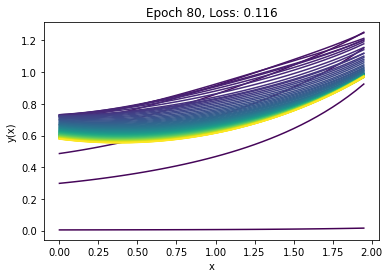

11:49:01.964 [INFO] W = [ 0.1722,  0.1312,  0.1077,  0.2370,  0.0783,  0.0001,  0.1343,  0.0001,  0.1387,  0.1719,  0.1320,  0.1103,  0.2336,  0.0767,  0.0000,  0.1363,  0.0001,  0.1389,  0.1665,  0.1330,  0.1161,  0.2168,  0.0915,  0.0001,  0.1374,  0.0002,  0.1391,  0.1937,  0.1093,  0.0612,  0.3255,  0.1142,  0.0014,  0.0732,  0.0024,  0.1192,  0.1283,  0.0886,  0.1113,  0.1444,  0.1195,  0.1253,  0.1123,  0.0660,  0.1041,  0.1254,  0.0919,  0.1115,  0.1394,  0.1179,  0.1229,  0.1120,  0.0739,  0.1052,  0.1454,  0.0608,  0.1134,  0.1770,  0.1319,  0.1409,  0.1140,  0.0202,  0.0947,  0.1308,  0.0969,  0.1073,  0.1539,  0.1127,  0.1181,  0.1100,  0.0625,  0.1078,  0.1560,  0.0705,  0.1005,  0.2115,  0.1198,  0.1371,  0.1038,  0.0000,  0.0993,  0.1784,  0.0931,  0.0880,  0.2680,  0.0867,  0.0659,  0.1030,  0.0001,  0.1152, -0.0844]
11:49:01.967 [INFO] Pruning weights...
11:49:01.985 [INFO] Shed 0.7626537084579468 weight
11:49:02.993 [INFO] Constructed symbolic model
11:49:03.660 [INFO]

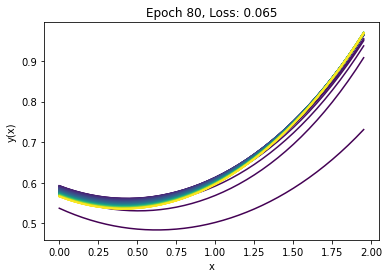

11:49:35.700 [INFO] W = [ 0.2355,  0.1712,  0.1325,  0.1115,  0.2310,  0.0747,  0.0002,  0.1393,  0.0002,  0.1394,  0.1655,  0.1334,  0.1176,  0.2133,  0.0897,  0.0002,  0.1406,  0.0002,  0.1395,  0.1873,  0.1035,  0.0621,  0.3117,  0.1384,  0.0001,  0.0649,  0.0184,  0.1138,  0.1282,  0.0897,  0.1107,  0.1447,  0.1193,  0.1247,  0.1116,  0.0666,  0.1044,  0.1251,  0.0932,  0.1107,  0.1398,  0.1176,  0.1222,  0.1111,  0.0746,  0.1055,  0.1456,  0.0616,  0.1118,  0.1789,  0.1338,  0.1409,  0.1125,  0.0200,  0.0947,  0.1302,  0.0978,  0.1075,  0.1525,  0.1123,  0.1172,  0.1102,  0.0642,  0.1081,  0.1553,  0.0705,  0.1013,  0.2093,  0.1205,  0.1368,  0.1045,  0.0023,  0.0993,  0.1766,  0.0919,  0.0890,  0.2635,  0.0891,  0.0672,  0.1033,  0.0047,  0.1144, -0.0838]
11:49:35.730 [INFO] Pruning weights...
11:49:35.950 [INFO] Shed 0.7689635753631592 weight
11:49:35.806 [INFO] Constructed symbolic model
11:49:35.875 [INFO] Integrated
11:49:40.377 [INFO] Substituted y's with replacements
11:49:

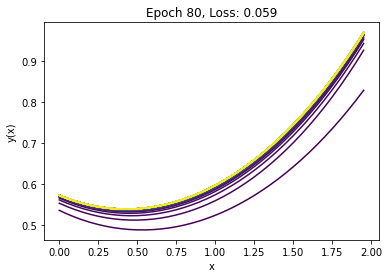

11:49:59.787 [INFO] W = [ 0.2349,  0.2304,  0.1652,  0.1338,  0.1185,  0.2118,  0.0886,  0.0002,  0.1420,  0.0001,  0.1398,  0.1833,  0.1030,  0.0653,  0.3005,  0.1436,  0.0001,  0.0647,  0.0265,  0.1130,  0.1283,  0.0895,  0.1107,  0.1449,  0.1195,  0.1249,  0.1116,  0.0663,  0.1044,  0.1251,  0.0937,  0.1104,  0.1400,  0.1175,  0.1220,  0.1107,  0.0749,  0.1057,  0.1450,  0.0645,  0.1095,  0.1800,  0.1337,  0.1402,  0.1103,  0.0214,  0.0954,  0.1301,  0.0983,  0.1072,  0.1526,  0.1121,  0.1170,  0.1099,  0.0645,  0.1083,  0.1547,  0.0733,  0.0995,  0.2098,  0.1199,  0.1360,  0.1027,  0.0040,  0.1001,  0.1746,  0.0934,  0.0897,  0.2588,  0.0891,  0.0658,  0.1037,  0.0101,  0.1147, -0.0803]
11:49:59.790 [INFO] Pruning weights...
11:49:59.809 [INFO] Shed 0.7881627082824707 weight
11:50:00.345 [INFO] Constructed symbolic model
11:50:00.421 [INFO] Integrated
11:50:04.622 [INFO] Substituted y's with replacements
11:50:08.100 [INFO] Lambdified
11:50:08.101 [INFO] Constructed JAXified model


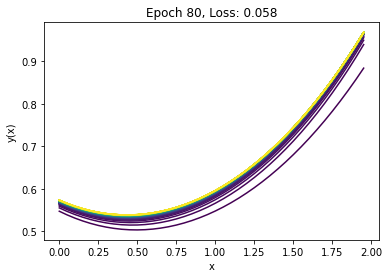

11:50:23.108 [INFO] W = [ 0.2344,  0.2298,  0.2113,  0.1808,  0.1039,  0.0681,  0.2927,  0.1427,  0.0002,  0.0654,  0.0329,  0.1132,  0.1284,  0.0893,  0.1107,  0.1452,  0.1196,  0.1250,  0.1116,  0.0660,  0.1043,  0.1252,  0.0935,  0.1104,  0.1402,  0.1176,  0.1221,  0.1107,  0.0745,  0.1056,  0.1444,  0.0672,  0.1076,  0.1806,  0.1331,  0.1396,  0.1084,  0.0229,  0.0962,  0.1303,  0.0982,  0.1071,  0.1530,  0.1121,  0.1171,  0.1099,  0.0640,  0.1083,  0.1540,  0.0760,  0.0981,  0.2098,  0.1189,  0.1352,  0.1013,  0.0058,  0.1010,  0.1739,  0.0961,  0.0890,  0.2581,  0.0876,  0.0642,  0.1032,  0.0122,  0.1157, -0.0769]
11:50:23.110 [INFO] Pruning weights...
11:50:23.131 [INFO] Shed 0.7071765661239624 weight
11:50:23.580 [INFO] Constructed symbolic model
11:50:23.647 [INFO] Integrated
11:50:27.540 [INFO] Substituted y's with replacements
11:50:30.820 [INFO] Lambdified
11:50:30.821 [INFO] Constructed JAXified model


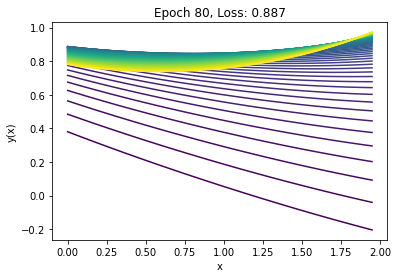

11:50:59.484 [INFO] W = [ 0.4296,  0.3263,  0.2479,  0.0686,  0.1298,  0.0819,  0.1433,  0.1152,  0.0947,  0.1065,  0.1405,  0.0798,  0.1087,  0.1216,  0.0967,  0.1189,  0.1245,  0.1095,  0.1161,  0.1188,  0.0880,  0.1084,  0.1153,  0.1132,  0.0205,  0.2096,  0.1950,  0.1802,  0.0342,  0.0453,  0.0917,  0.1252,  0.0998,  0.1154,  0.1346,  0.1084,  0.1119,  0.1179,  0.0800,  0.1099,  0.1294,  0.1265,  0.0461,  0.2127,  0.1494,  0.1229,  0.0520,  0.0541,  0.1074,  0.1429,  0.1402,  0.0598,  0.2253,  0.1015,  0.0534,  0.0691,  0.0865,  0.1222, -0.0019]
11:50:59.487 [INFO] Pruning weights...
11:50:59.528 [INFO] Shed 0.8571221828460693 weight
11:51:00.161 [INFO] Constructed symbolic model
11:51:00.324 [INFO] Integrated
11:51:02.606 [INFO] Substituted y's with replacements
11:51:04.633 [INFO] Lambdified
11:51:04.635 [INFO] Constructed JAXified model


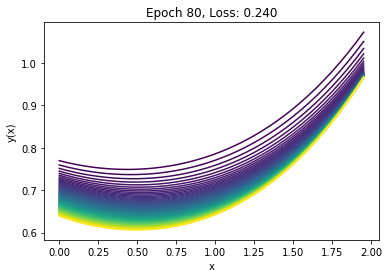

11:51:26.940 [INFO] W = [ 0.4460,  0.3396,  0.2660,  0.0836,  0.1491,  0.1188,  0.0973,  0.1240,  0.1138,  0.1053,  0.1130,  0.1237,  0.0960,  0.1092,  0.1171,  0.0906,  0.0288,  0.2050,  0.2153,  0.1780,  0.0440,  0.0370,  0.0831,  0.1224,  0.1005,  0.1198,  0.1246,  0.1045,  0.1090,  0.1222,  0.0874,  0.1106,  0.1323,  0.1050,  0.0548,  0.2098,  0.1675,  0.1231,  0.0618,  0.0449,  0.0997,  0.1450,  0.1178,  0.0610,  0.2283,  0.1249,  0.0666,  0.0676,  0.0771,  0.1115, -0.0263]
11:51:26.970 [INFO] Pruning weights...
11:51:26.134 [INFO] Shed 0.8770160675048828 weight
11:51:26.554 [INFO] Constructed symbolic model
11:51:26.692 [INFO] Integrated
11:51:28.381 [INFO] Substituted y's with replacements
11:51:29.718 [INFO] Lambdified
11:51:29.719 [INFO] Constructed JAXified model


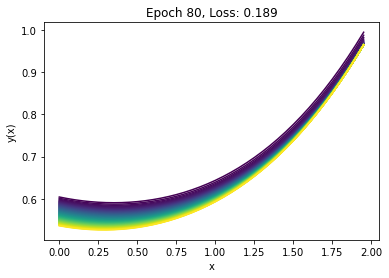

11:51:46.899 [INFO] W = [ 0.4398,  0.3462,  0.2771,  0.0815,  0.1521,  0.1289,  0.1203,  0.0809,  0.0310,  0.2092,  0.2323,  0.1659,  0.0463,  0.0330,  0.0797,  0.1207,  0.0984,  0.1227,  0.1183,  0.1034,  0.1119,  0.1256,  0.0898,  0.1099,  0.1354,  0.0952,  0.0570,  0.2137,  0.1823,  0.1149,  0.0640,  0.0400,  0.0961,  0.1469,  0.1068,  0.0593,  0.2337,  0.1418,  0.0689,  0.0654,  0.0706,  0.1059, -0.0392]
11:51:46.901 [INFO] Pruning weights...
11:51:46.934 [INFO] Shed 0.7663649320602417 weight
11:51:47.230 [INFO] Constructed symbolic model
11:51:47.366 [INFO] Integrated
11:51:48.684 [INFO] Substituted y's with replacements
11:51:49.855 [INFO] Lambdified
11:51:49.856 [INFO] Constructed JAXified model


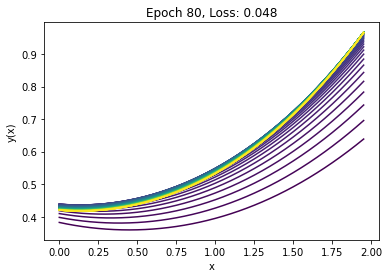

11:52:04.115 [INFO] W = [ 0.4738,  0.3930,  0.2893,  0.0455,  0.1735,  0.1345,  0.2554,  0.1223,  0.0966,  0.1296,  0.1145,  0.0984,  0.1052,  0.1313,  0.0911,  0.1110,  0.1283,  0.1029,  0.0345,  0.2221,  0.1967,  0.1375,  0.0455,  0.0396,  0.0931,  0.1430,  0.1178,  0.0495,  0.2358,  0.1440,  0.0671,  0.0562,  0.0782,  0.1081, -0.0243]
11:52:04.117 [INFO] Pruning weights...
11:52:04.140 [INFO] Shed 0.868620753288269 weight
11:52:04.258 [INFO] Constructed symbolic model
11:52:04.361 [INFO] Integrated
11:52:04.793 [INFO] Substituted y's with replacements
11:52:05.190 [INFO] Lambdified
11:52:05.192 [INFO] Constructed JAXified model


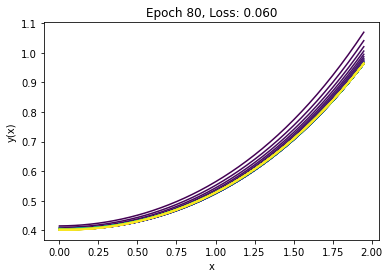

11:52:14.469 [INFO] W = [ 0.4669,  0.3712,  0.2821,  0.0494,  0.1634,  0.1311,  0.2533,  0.1295,  0.1316,  0.1006,  0.0397,  0.2235,  0.1978,  0.1237,  0.0493,  0.0391,  0.0939,  0.1454,  0.1145,  0.0534,  0.2368,  0.1453,  0.0605,  0.0592,  0.0765,  0.1079, -0.0300]
11:52:14.471 [INFO] Pruning weights...
11:52:14.498 [INFO] Shed 0.7757812142372131 weight
11:52:14.561 [INFO] Constructed symbolic model
11:52:14.662 [INFO] Integrated
11:52:14.868 [INFO] Substituted y's with replacements
11:52:15.172 [INFO] Lambdified
11:52:15.173 [INFO] Constructed JAXified model


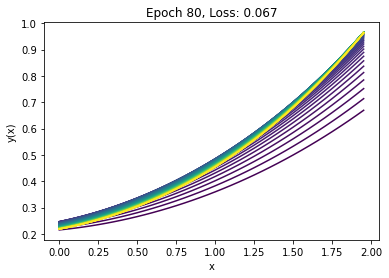

11:52:23.744 [INFO] W = [ 0.5106,  0.3780,  0.3401,  0.0250,  0.1665,  0.1598,  0.2843,  0.1485,  0.2345,  0.1357,  0.1142,  0.0351,  0.2356,  0.1574,  0.1012,  0.0467,  0.0739,  0.1015, -0.0206]
11:52:23.746 [INFO] Pruning weights...
11:52:23.776 [INFO] Shed 0.7657077312469482 weight
11:52:23.811 [INFO] Constructed symbolic model
11:52:23.932 [INFO] Integrated
11:52:23.988 [INFO] Substituted y's with replacements
11:52:24.960 [INFO] Lambdified
11:52:24.970 [INFO] Constructed JAXified model


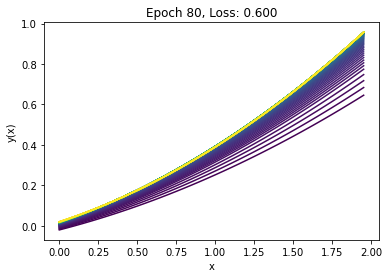

11:52:30.743 [INFO] W = [ 0.5853,  0.3888,  0.3527,  0.0099,  0.1721,  0.1665,  0.3460,  0.1503,  0.2586,  0.2588,  0.0197]
11:52:30.745 [INFO] Pruning weights...
11:52:30.804 [INFO] Constructed symbolic model
11:52:30.926 [INFO] Integrated
11:52:30.939 [INFO] Substituted y's with replacements


Nothing more to prune!


11:52:31.180 [INFO] Lambdified
11:52:31.190 [INFO] Constructed JAXified model


In [37]:
plotting = Plotting(None, network, x_bounds, c1_bounds)

key = random.PRNGKey(7)

key, subkey = random.split(key)
W = random.uniform(subkey, shape=(len(network.alphas),), minval=0, maxval=0.001)

is_final = False

best = DotDict({"loss": np.inf})

while not is_final:
    plotting.funcs = []
    train_results = train(
        network,
        dataset = [(2, 1)],
        plotting = plotting,
        key = key,
        lr = 0.0002,
        lr_2 = 0.0001,
        epochs = 80,
        verbose = 0,
        batch_size = 16,
        W_init = W,
        best = best
    )

    W = train_results.W
    loss_history = train_results.loss_history

    info('Pruning weights...')
    network.assign_weights(W)
    W, model_y, loss_and_grad, is_final = network.prune_auto()

In [ ]:
# best

In [ ]:
# best.model_y

In [40]:
y_prediction_last = model_y.subs(zip(network.alphas, W))
y_prediction_last

0.118522703993978*x**2 + 0.233210768412234*x + 0.0388899850900422*sin(0.489570801277294*x) + 0.0196965336799622

In [39]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
# y_prediction_best

Total loss su išgautu modeliu

$ \displaystyle
\mathcal{L} = \int_{x} \int_{c_1} \left( \frac{d^2 y}{d x^2} - \frac{c_1 y}{1 + y} \right)^2 \; dc_1 \; dx
$


In [44]:
c1_integrated_model = network.get_integrated_model_nolambdify(y_prediction_last)

15:21:39.395 [INFO] Integrated
15:21:39.398 [INFO] Substituted y's with replacements


In [47]:
# TODO:
sp.integrate(c1_integrated_model, (network.x, 0, 2))

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [7.72567667362243e-6*_x1**2 + 8.13151629364128e-20*_x1 + 0.000392942748303794*_x2 + 0.00914385353361851, 1.52013996715051e-5*_x1**2 + 6.7762635780344e-21*_x1*_x2 + 2.16840434497101e-19*_x1 + 0.000773172372768332*_x2 + 0.0179918702237205, 2.53496959251729e-6*_x1**2*_x2 + 6.64669760219541e-5*_x1**2 + 2.03287907341032e-20*_x1*_x2 + 3.25260651745651e-19*_x1 + 0.000128933420414971*_x2**2 + 0.0063809435701571*_x2 + 0.0786680985035725] by [-7.1067608776051e-27*_x1**5 - 2.49438915156325e-26*_x1**4*_x2 + 1.13708174041682e-25*_x1**4 - 9.09665392333453e-25*_x1**3*_x2 + 2.91092925546705e-23*_x1**3 - 1.26869421276836e-24*_x1**2*_x2**2 + 1.39724604262418e-21*_x1**2 - 2.91092925546705e-23*_x1*_x2**2 + 2.98079155759826e-20*_x1 + 9.31497361749456e-22*_x2**2 + 1.04327704515939e-19*_x2 + 1.55001160995109e-18, 2.84270435104204e-26*_x1**4*_x2 + 1.36449808850018e-24*_x1**4 + 7.27732313866762e-24*_x1**3*_x2 + 2.32874340437364e-22*_x1**3 + 3.63866156933381e-24*_x1**2*_x2**2 + 3.72598944699782e-21*_x1**2 + 2.32874340437364e-22*_x1*_x2**2 + 1.49039577879913e-20*_x1*_x2 + 1.78847493455896e-19*_x1 + 3.72598944699782e-21*_x2**2 + 5.96158311519652e-20*_x2 + 9.53853298431443e-19]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_x1,_x2]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.